In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


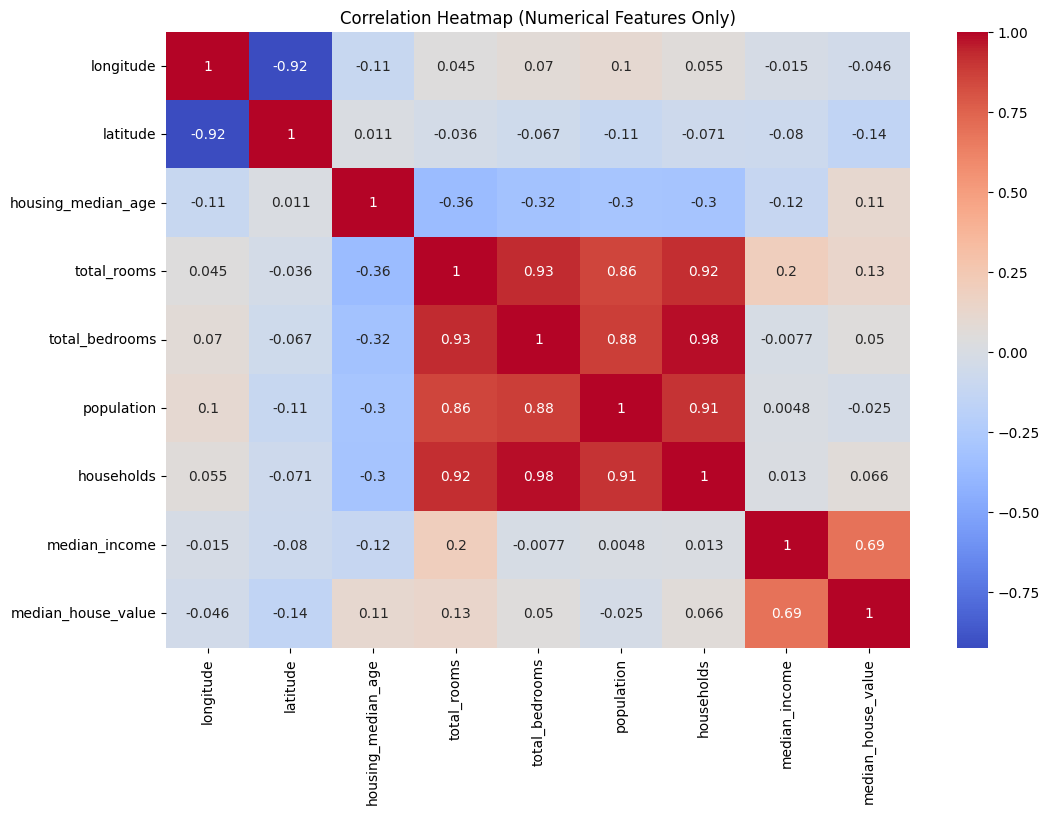

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

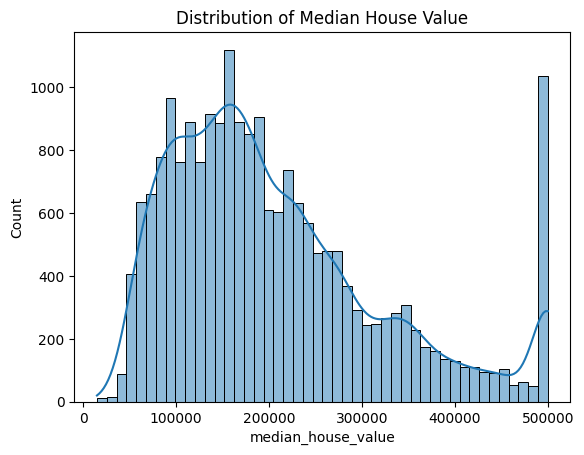

In [8]:
sns.histplot(df['median_house_value'], kde=True)
plt.title("Distribution of Median House Value")
plt.show()

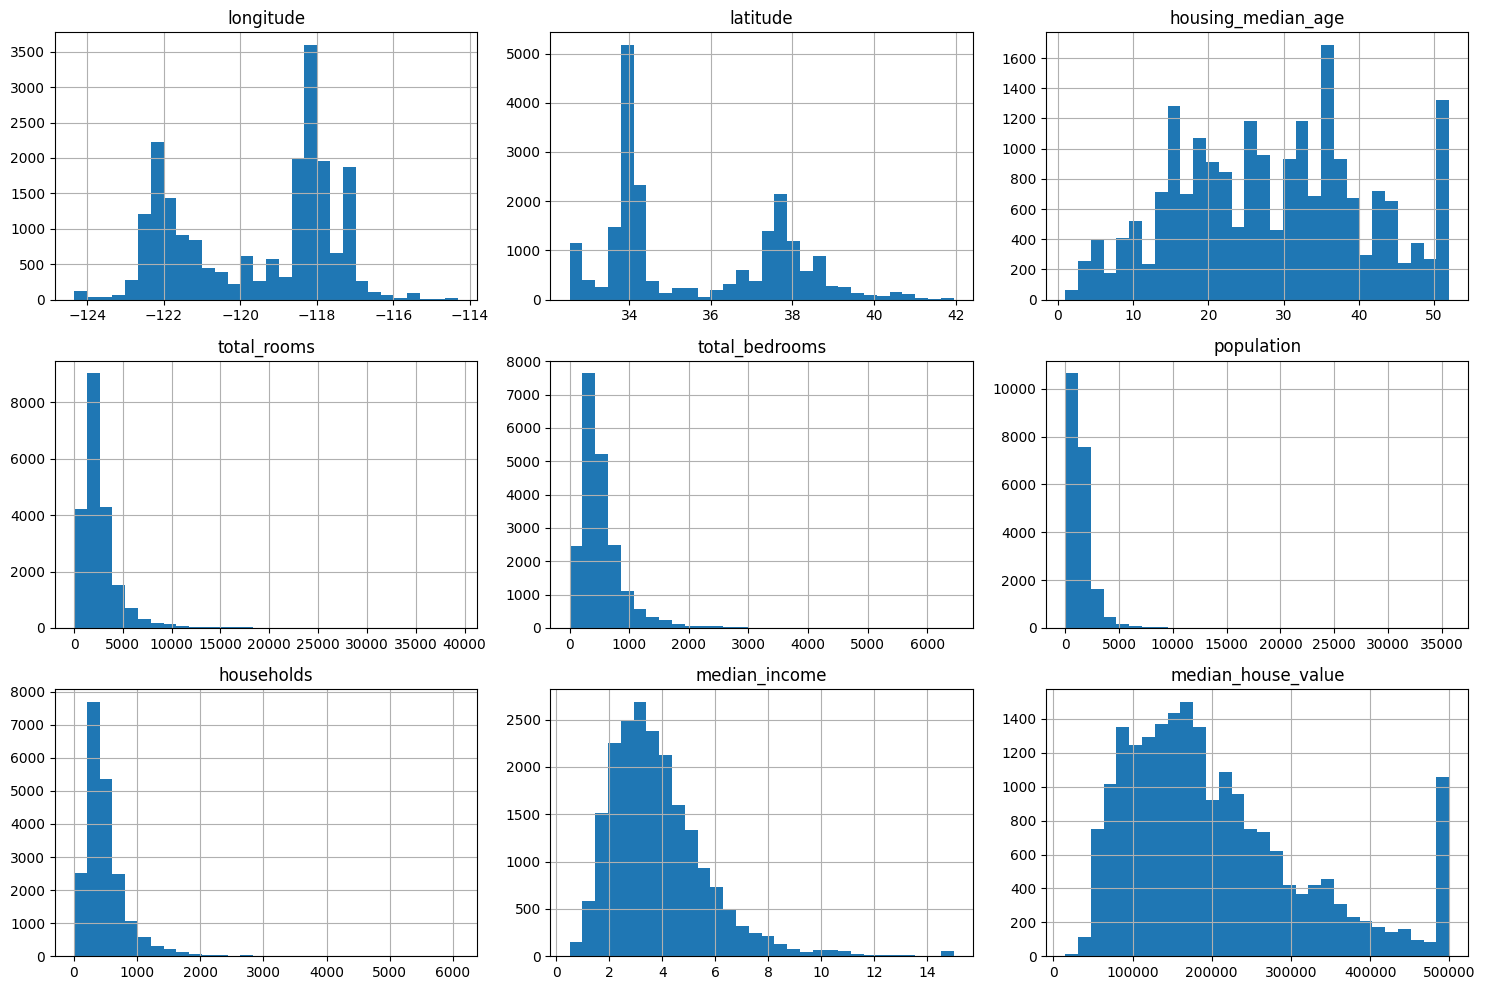

In [9]:
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

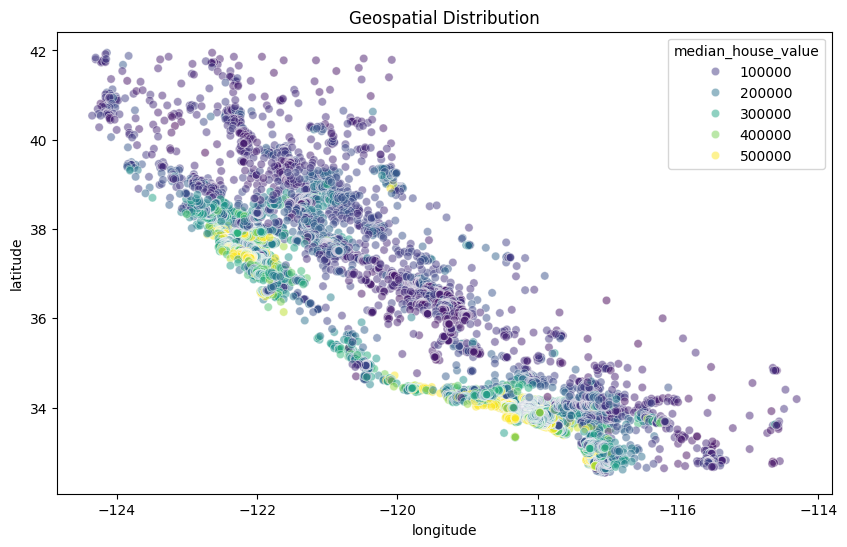

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='viridis', alpha=0.5)
plt.title("Geospatial Distribution")
plt.show()

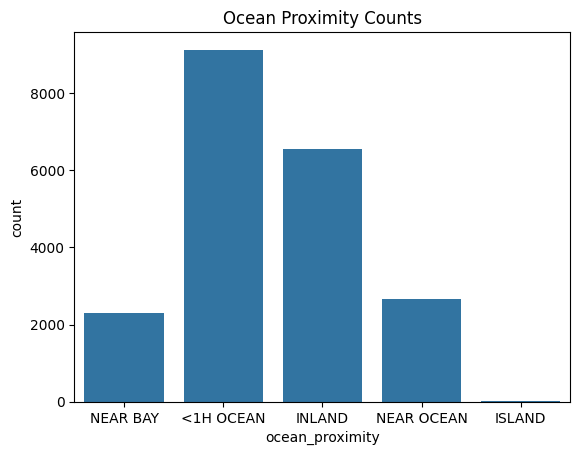

In [11]:
sns.countplot(x='ocean_proximity', data=df)
plt.title("Ocean Proximity Counts")
plt.show()

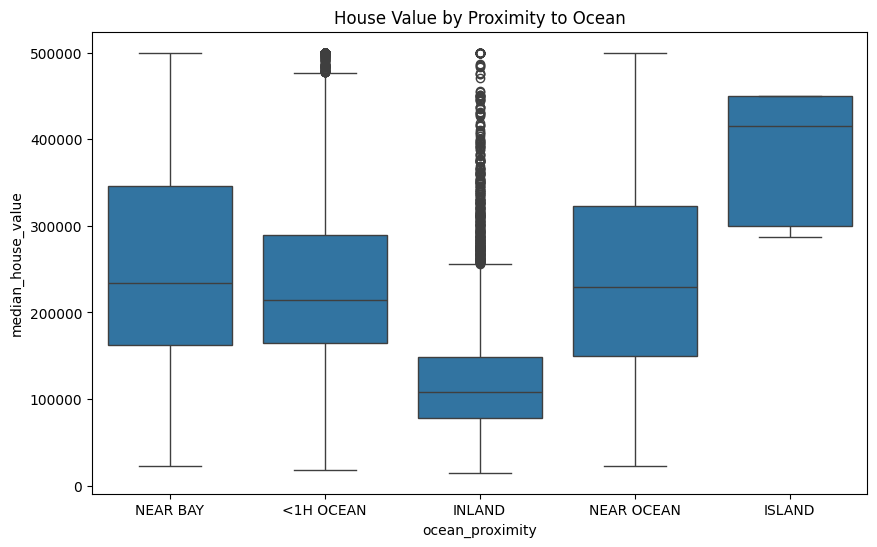

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title("House Value by Proximity to Ocean")
plt.show()

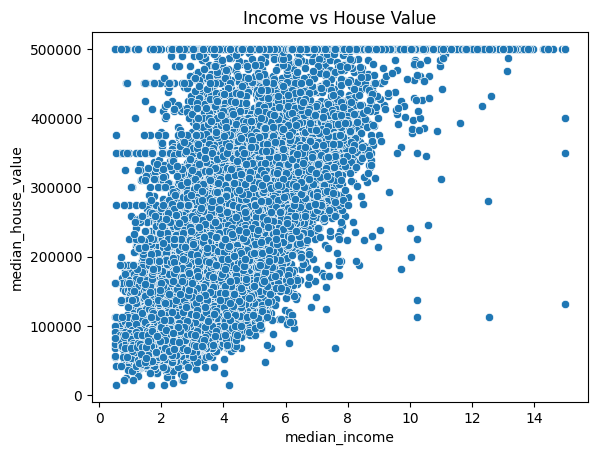

In [13]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title("Income vs House Value")
plt.show()

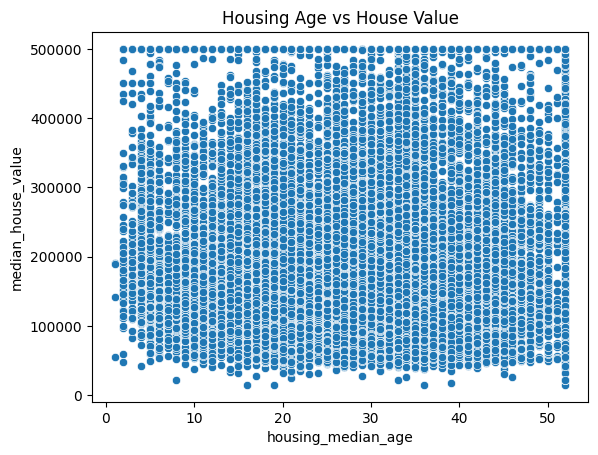

In [14]:
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df)
plt.title("Housing Age vs House Value")
plt.show()

In [15]:
df = df.dropna()

In [16]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [17]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression R2 Score: 0.6488402154431994


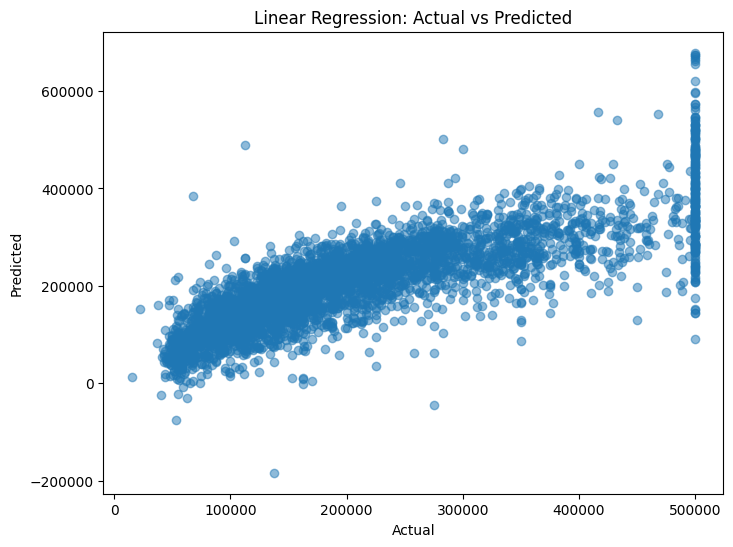

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [25]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree R2 Score: 0.7218864235934397


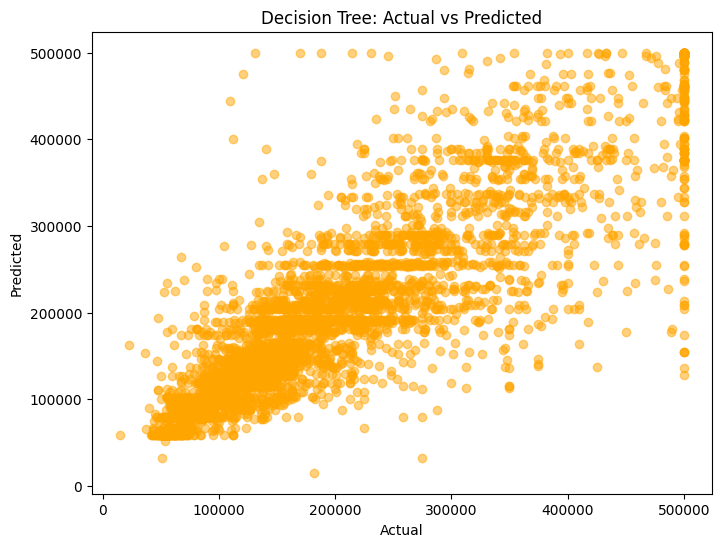

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='orange')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()

In [27]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest R2 Score: 0.7860450945861044


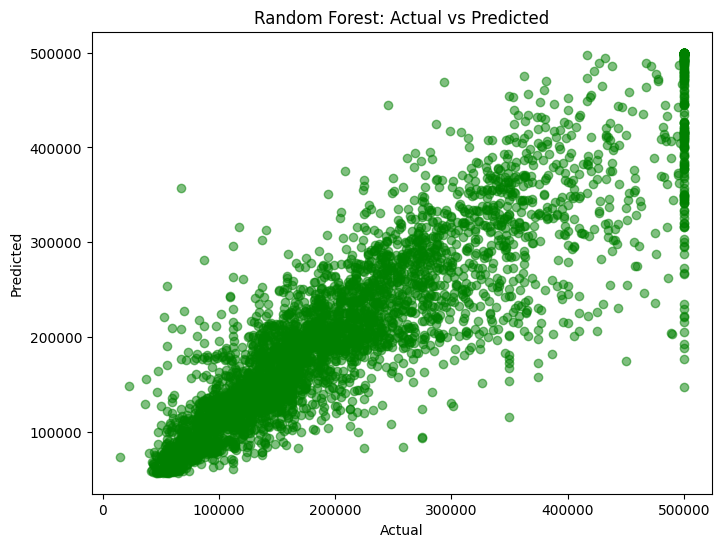

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

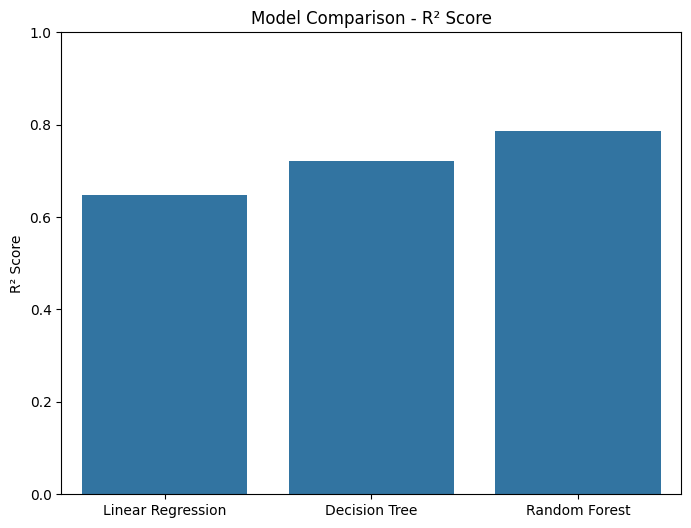

In [29]:
scores = {
    'Linear Regression': r2_score(y_test, y_pred_lr),
    'Decision Tree': r2_score(y_test, y_pred_dt),
    'Random Forest': r2_score(y_test, y_pred_rf)
}

plt.figure(figsize=(8,6))
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.show()

In [32]:
bins = [0, 150000, 300000, df['median_house_value'].max()]
labels = ['Low', 'Medium', 'High']
df['value_category'] = pd.cut(df['median_house_value'], bins=bins, labels=labels)

In [33]:
df['value_category'] = df['value_category'].astype(str)

In [34]:
X_cls = df.drop(['median_house_value', 'value_category'], axis=1)
y_cls = df['value_category']

In [35]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [36]:
scaler_cls = StandardScaler()
X_train_cls = scaler_cls.fit_transform(X_train_cls)
X_test_cls = scaler_cls.transform(X_test_cls)

In [37]:
lr_cls = LogisticRegression(max_iter=1000)
lr_cls.fit(X_train_cls, y_train_cls)
y_pred_lr_cls = lr_cls.predict(X_test_cls)

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_cls = DecisionTreeClassifier(max_depth=10)
dt_cls.fit(X_train_cls, y_train_cls)
y_pred_dt_cls = dt_cls.predict(X_test_cls)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_cls.fit(X_train_cls, y_train_cls)
y_pred_rf_cls = rf_cls.predict(X_test_cls)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression Classification Report")
print(classification_report(y_test_cls, y_pred_lr_cls))

print("Decision Tree Classification Report")
print(classification_report(y_test_cls, y_pred_dt_cls))

print("Random Forest Classification Report")
print(classification_report(y_test_cls, y_pred_rf_cls))

Logistic Regression Classification Report
              precision    recall  f1-score   support

        High       0.80      0.59      0.68       800
         Low       0.81      0.78      0.80      1524
      Medium       0.69      0.79      0.74      1763

    accuracy                           0.75      4087
   macro avg       0.77      0.72      0.74      4087
weighted avg       0.76      0.75      0.75      4087

Decision Tree Classification Report
              precision    recall  f1-score   support

        High       0.82      0.67      0.74       800
         Low       0.84      0.81      0.83      1524
      Medium       0.74      0.82      0.78      1763

    accuracy                           0.79      4087
   macro avg       0.80      0.77      0.78      4087
weighted avg       0.79      0.79      0.79      4087

Random Forest Classification Report
              precision    recall  f1-score   support

        High       0.91      0.57      0.70       800
         Low   